https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

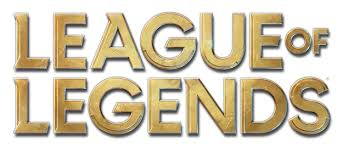

League of Legends (LoL) is a multiplayer online battle arena video game developed and published by Riot Games for Microsoft Windows and macOS. In League of Legends, players assume the role of a "champion" with unique abilities and battle against a team of other player- or computer-controlled champions. The goal is usually to destroy the opposing team's "Nexus", a structure that lies at the heart of a base protected by defensive structures, although other distinct game modes exist as well with varying objectives, rules, and maps. Each League of Legends match is discrete, with all champions starting off relatively weak but increasing in strength by accumulating items and experience over the course of the game. This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level. There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level… It's up to you to do some feature engineering to get more insights. The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. This notebook is aim to predict which features are more correlated with winning.

# 1. SET UP

In [192]:
#Import thư viện
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [193]:
df= pd.read_csv('E:\Dataset\high_diamond_ranked_10min.csv')

In [194]:
#In ra tên các cột
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

wards: mắt
Heralds: Sứ giả khe nứt

In [195]:
#preview data
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [197]:
#Bỏ đi một số cột ảnh hưởng bởi nhau (VD: Blue first blood = 1 thì Red first blood = 0 hoặc BlueDeaths = RedKills)
df_clean = df.copy()
cols = ['gameId', 'blueEliteMonsters', 'blueGoldDiff', 'blueExperienceDiff', 'redFirstBlood', 'redKills', 'redDeaths', 
        'redEliteMonsters', 'redGoldDiff', 'redExperienceDiff'
]
df_clean  = df_clean.drop(cols, axis = 1)

In [198]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueDragons                   9879 non-null   int64  
 8   blueHeralds                   9879 non-null   int64  
 9   blueTowersDestroyed           9879 non-null   int64  
 10  blueTotalGold                 9879 non-null   int64  
 11  blueAvgLevel                  9879 non-null   float64
 12  blueTotalExperience           9879 non-null   int64  
 13  blu

Phân loại các cột
- Dữ liệu loại categorical: 
+ Nominal (Danh nghĩa): Các giá trị không có thứ tự tự nhiên, ví dụ như giới tính (nam, nữ), màu sắc (đỏ, xanh, vàng).
+ Ordinal (Thứ tự): Các giá trị có thứ tự rõ ràng nhưng không có khoảng cách xác định giữa các mức, ví dụ như mức độ hài lòng (tốt, trung bình, kém), thứ hạng (hạng nhất, hạng nhì).
- Dữ liệu loại numerical: 
+ Discrete (Rời rạc): Các giá trị số đếm được, không liên tục, ví dụ như số trẻ em trong một gia đình (các giá trị có thể là 0, 1, 2, 3,...).
+ Continuous (Liên tục): Các giá trị có thể nằm trong một khoảng liên tục, ví dụ như chiều cao, cân nặng, hoặc nhiệt độ. Các giá trị có thể nhận mọi số thực trong một khoảng.
+ Timeseries (Chuỗi thời gian): Là dạng đặc trưng số học được thu thập theo thời gian, ví dụ như giá cổ phiếu, nhiệt độ theo từng giờ, hoặc lưu lượng truy cập mạng theo thời gian.

Trong bộ dữ liệu này
+ Categorical: blueWins, blueFirstBlood, blueDragons, blueHeralds,blueTowersDestroyed, redDragons, redHeralds, redTowersDestroyed
+ Numerical: Những cột còn lại


In [199]:
features = ['blueWins', 'blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons', 
  'redHeralds']

def convert(df1, features):
    for feature in features:
        df1[feature] = df1[feature].astype('category')

convert(df_clean, features)


In [200]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   blueWins                      9879 non-null   category
 1   blueWardsPlaced               9879 non-null   int64   
 2   blueWardsDestroyed            9879 non-null   int64   
 3   blueFirstBlood                9879 non-null   category
 4   blueKills                     9879 non-null   int64   
 5   blueDeaths                    9879 non-null   int64   
 6   blueAssists                   9879 non-null   int64   
 7   blueDragons                   9879 non-null   category
 8   blueHeralds                   9879 non-null   category
 9   blueTowersDestroyed           9879 non-null   int64   
 10  blueTotalGold                 9879 non-null   int64   
 11  blueAvgLevel                  9879 non-null   float64 
 12  blueTotalExperience           9879 non-null   in

Thống kê dữ liệu dạng số:

In [201]:
df_clean.describe()

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,...,redWardsDestroyed,redAssists,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,6.183925,6.137666,6.645106,0.051422,16503.455512,6.916004,17928.110133,216.699565,...,2.723150,6.662112,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,21.734923,1648.904140
std,18.019177,2.174998,3.011028,2.933818,4.064520,0.244369,1535.446636,0.305146,1200.523764,21.858437,...,2.138356,4.060612,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,...,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,10.700000,1121.200000
25%,14.000000,1.000000,4.000000,4.000000,4.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,...,1.000000,4.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,20.300000,1542.750000
50%,16.000000,3.000000,6.000000,6.000000,6.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,...,2.000000,6.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,21.800000,1637.800000
75%,20.000000,4.000000,8.000000,8.000000,9.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,...,4.000000,9.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,23.300000,1741.850000
max,250.000000,27.000000,22.000000,22.000000,29.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,...,24.000000,28.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,28.900000,2273.200000


In [202]:
df_clean.describe(include = ['category'])

,blueWins,blueFirstBlood,blueDragons,blueHeralds,redDragons,redHeralds
count,9879,9879,9879,9879,9879,9879
unique,2,2,2,2,2,2
top,0,1,0,0,0,0
freq,4949,4987,6303,8022,5798,8298


# 2. EDA

In [203]:
df_clean['blueWins'].value_counts().to_frame()

,blueWins
0,4949
1,4930


Chúng ta sẽ sử dụng chủ yếu Data của blue để tính toán tỷ lệ chiến thắng của Blue_side, các Data của Red_side sẽ chủ yếu dùng để so sánh 1 số các yếu tố giữa đội xanh và đội đỏ trong trận đấu.

In [204]:
#Tạo dataset mới chỉ gồm các dữ liệu của Blue_side
Blue_columns = []
for col in df_clean.columns:
    if 'blue' in col:
        Blue_columns.append(col)
df_clean_blue = df_clean[Blue_columns]
df_clean_blue

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,17210,6.6,17039,195,36,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,14712,6.6,16265,174,43,17.4,1471.2
2,0,15,0,0,7,11,4,1,0,0,16113,6.4,16221,186,46,18.6,1611.3
3,0,43,1,0,4,5,5,0,1,0,15157,7.0,17954,201,55,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,16400,7.0,18543,210,57,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,0,0,17765,7.2,18967,211,69,21.1,1776.5
9875,1,54,0,0,6,4,8,1,0,0,16238,7.2,19255,233,48,23.3,1623.8
9876,0,23,1,0,6,7,5,0,0,0,15903,7.0,18032,210,45,21.0,1590.3
9877,0,14,4,1,2,3,3,1,0,0,14459,6.6,17229,224,48,22.4,1445.9


<Axes: >

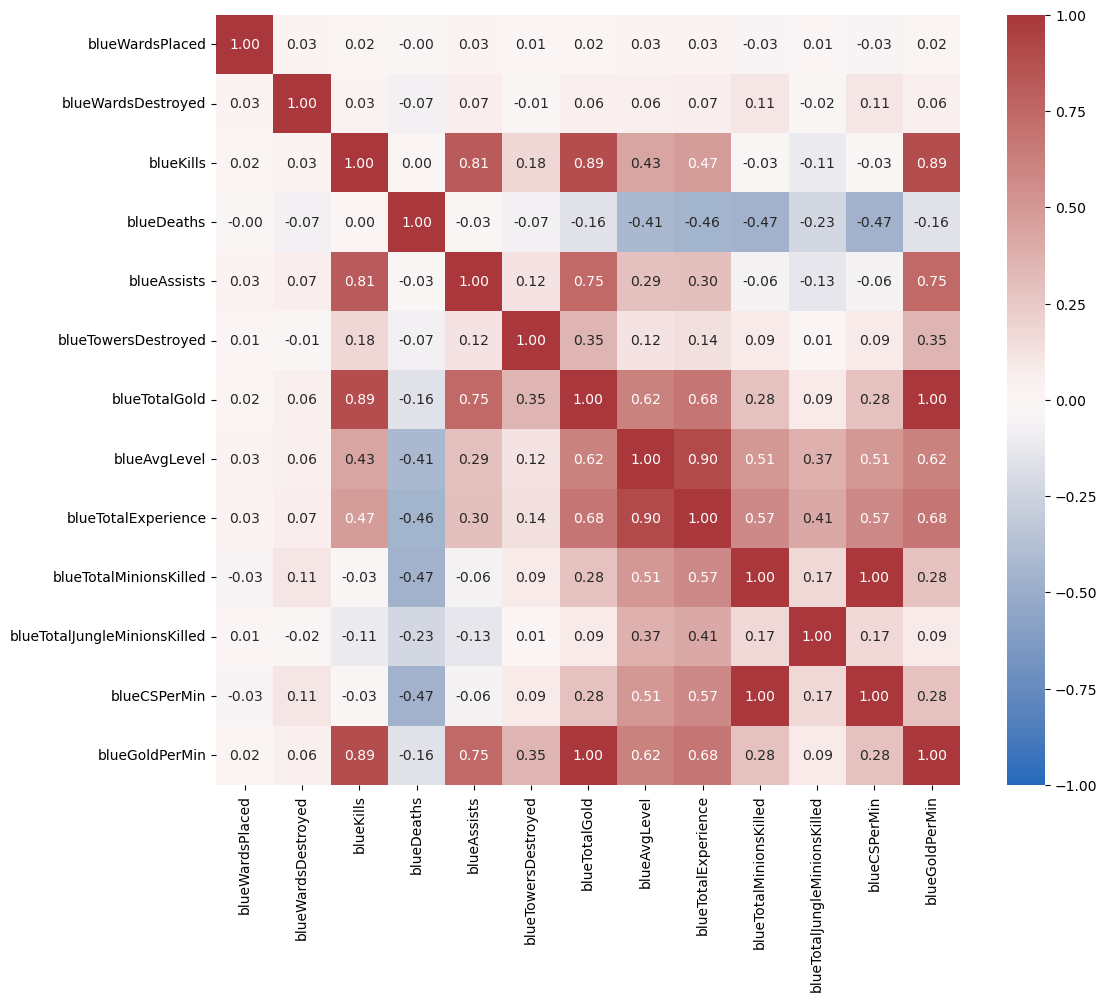

In [205]:
#Vẽ ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean_blue.drop("blueWins",axis=1).corr(numeric_only=True),cmap='vlag', annot=True, fmt='.2f', vmin=-1)

Dựa vào ma trận tương quan này, chúng ta có thể đưa ra 1 số nhận định sau:
1. Cột Kills và Assists có thể gộp làm 1 do có Kills thì mới có Assists
2. Các cột liên quan đến Gold có thể bỏ, do Gold kiếm được từ Kills, Assists, Towers và Minions do vậy tương quan giữ chúng cao đặc biệt là với 2 cột Kills và Assists do đây là những trận đánh rank nên vàng người chơi kiếm được chủ yếu từ đó
3. Các cột liên quan đến EXP cũng có thể bỏ do lý do tương tự
4. Cột CSPerMin cũng có thể bỏ do đây là dữ liệu của 10 phút đầu nên cột này cũng không có quá nhiều ý nghĩa

In [206]:
df_clean_blue2 = df_clean_blue.copy()

In [207]:
#Gộp cột Kills và Assists
df_clean_blue2['KDA'] = df_clean_blue2['blueKills'] + df_clean_blue2['blueAssists']
df_clean_blue2 = df_clean_blue2.drop(['blueAssists','blueKills'],axis=1)

In [208]:
df_clean_blue2

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueDeaths,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueCSPerMin,blueGoldPerMin,KDA
0,0,28,2,1,6,0,0,0,17210,6.6,17039,195,36,19.5,1721.0,20
1,0,12,1,0,5,0,0,0,14712,6.6,16265,174,43,17.4,1471.2,10
2,0,15,0,0,11,1,0,0,16113,6.4,16221,186,46,18.6,1611.3,11
3,0,43,1,0,5,0,1,0,15157,7.0,17954,201,55,20.1,1515.7,9
4,0,75,4,0,6,0,0,0,16400,7.0,18543,210,57,21.0,1640.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,4,1,0,0,17765,7.2,18967,211,69,21.1,1776.5,12
9875,1,54,0,0,4,1,0,0,16238,7.2,19255,233,48,23.3,1623.8,14
9876,0,23,1,0,7,0,0,0,15903,7.0,18032,210,45,21.0,1590.3,11
9877,0,14,4,1,3,1,0,0,14459,6.6,17229,224,48,22.4,1445.9,5


In [209]:
#Bỏ những cột không có ý nghĩa
drop_cols = ['blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueCSPerMin', 'blueGoldPerMin' ]
df_clean_blue2 = df_clean_blue2.drop(drop_cols, axis = 1)

In [210]:
df_clean_blue2

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueDeaths,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,KDA
0,0,28,2,1,6,0,0,0,195,36,20
1,0,12,1,0,5,0,0,0,174,43,10
2,0,15,0,0,11,1,0,0,186,46,11
3,0,43,1,0,5,0,1,0,201,55,9
4,0,75,4,0,6,0,0,0,210,57,12
...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,4,1,0,0,211,69,12
9875,1,54,0,0,4,1,0,0,233,48,14
9876,0,23,1,0,7,0,0,0,210,45,11
9877,0,14,4,1,3,1,0,0,224,48,5


<Axes: >

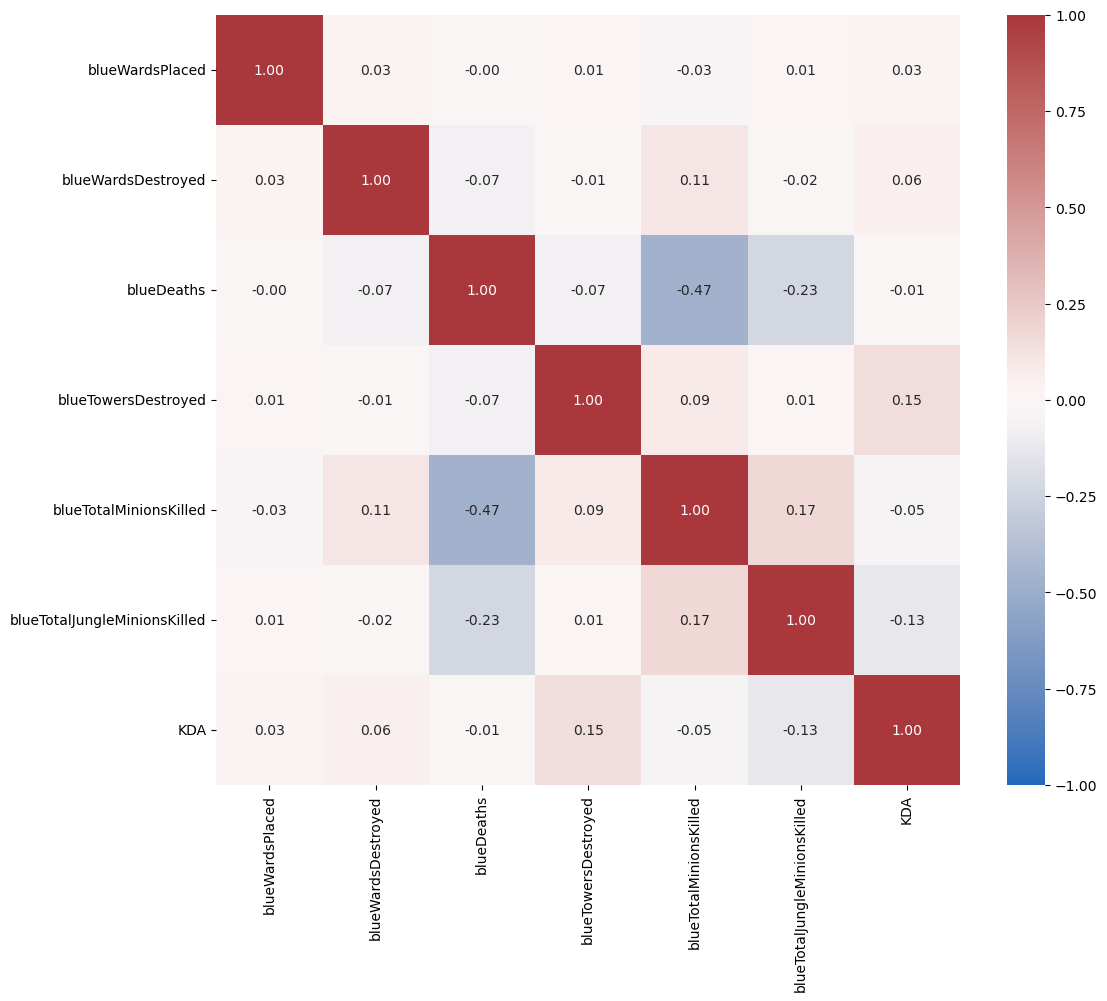

In [211]:
#Vẽ lại ma trận tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean_blue2.drop("blueWins",axis=1).corr(numeric_only=True),cmap='vlag', annot=True, fmt='.2f', vmin=-1)

In [212]:
df_clean_blue2.describe()

,blueWardsPlaced,blueWardsDestroyed,blueDeaths,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,KDA
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,6.137666,0.051422,216.699565,50.509667,12.829031
std,18.019177,2.174998,2.933818,0.244369,21.858437,9.898282,6.745558
min,5.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000
25%,14.000000,1.000000,4.000000,0.000000,202.000000,44.000000,8.000000
50%,16.000000,3.000000,6.000000,0.000000,218.000000,50.000000,12.000000
75%,20.000000,4.000000,8.000000,0.000000,232.000000,56.000000,17.000000
max,250.000000,27.000000,22.000000,4.000000,283.000000,92.000000,51.000000


# Outliers
Dựa vào thống kê ở trên và kiến thức về game, ta thấy có 1 số cột sau có thể có outliers: blueWardsPlaced, blueWardsDestroyed, blueTowersDestroyed, blueDeaths, KDA

In [213]:
df_clean_blue_no_outliers = df_clean_blue2.copy()

a) Wards

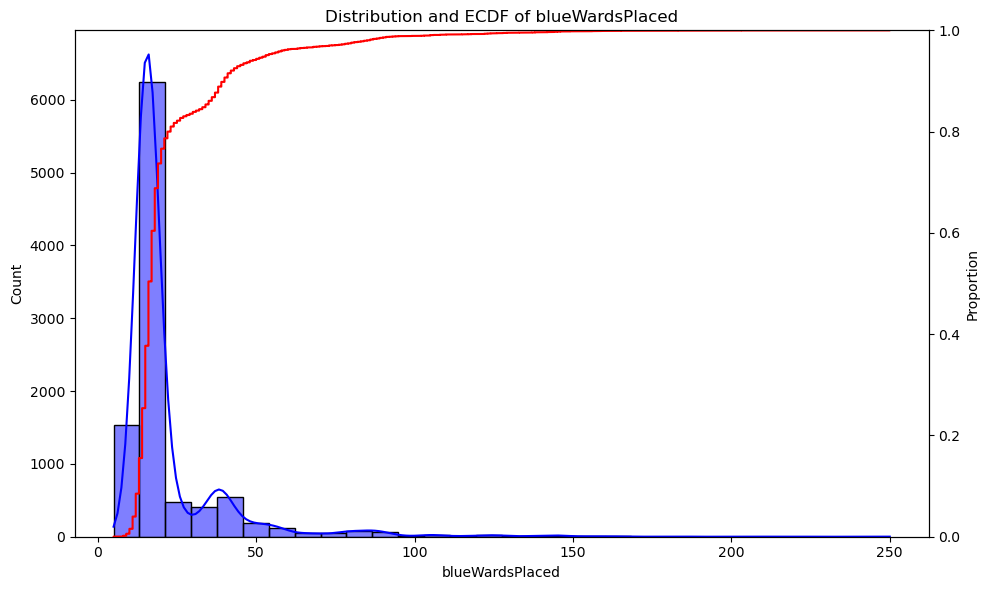

In [214]:
# Tạo figure và một trục chính
fig, ax1 = plt.subplots(figsize=(10, 6))

# Biểu đồ Histogram và KDE trên trục chính
sns.histplot(data=df_clean_blue2, x="blueWardsPlaced", kde=True, bins=30, ax=ax1, color='blue')
ax1.set_xlabel('blueWardsPlaced')
ax1.set_ylabel('Count')
ax1.set_title('Distribution and ECDF of blueWardsPlaced')

# Tạo trục thứ hai cho ECDF
ax2 = ax1.twinx()
sns.ecdfplot(data=df_clean_blue2, x="blueWardsPlaced", ax=ax2, color='red')
ax2.set_ylabel('Proportion')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


Việc cắm được hơn 50 mắt ở 10 phút đầu đã là khá khó rồi, thế nên việc cắm trên 100 mắt gần như là điều bất khả thi. Vậy nên sẽ loại bỏ những hàng có blueWardsPlaced từ 70 trở lên

In [215]:
df_clean_blue_no_outliers = df_clean_blue_no_outliers[df_clean_blue_no_outliers['blueWardsPlaced'] < 70]

In [216]:
print("Đã loại bỏ {} hàng có outliers".format(df_clean_blue2.shape[0] - df_clean_blue_no_outliers.shape[0]))

Đã loại bỏ 318 hàng có outliers


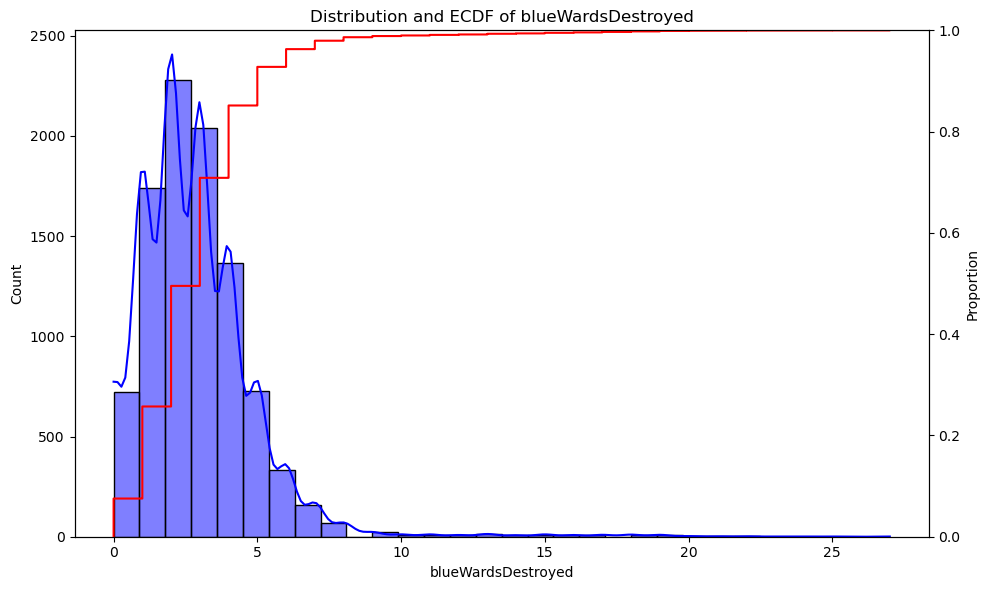

In [217]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.histplot(data=df_clean_blue_no_outliers, x="blueWardsDestroyed", kde=True, bins=30, ax=ax1, color='blue')
ax1.set_xlabel('blueWardsDestroyed')
ax1.set_ylabel('Count')
ax1.set_title('Distribution and ECDF of blueWardsDestroyed')

ax2 = ax1.twinx()
sns.ecdfplot(data=df_clean_blue_no_outliers, x="blueWardsDestroyed", ax=ax2, color='red')
ax2.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

Tương tự với số mắt phá, những trận đấu có số mắt phá >= 12 sẽ coi là ngoại lai

In [218]:
    df_clean_blue_no_outliers = df_clean_blue_no_outliers[df_clean_blue_no_outliers['blueWardsDestroyed'] < 12]

In [219]:
print("Đã loại bỏ {} hàng có outliers".format(df_clean_blue2.shape[0] - df_clean_blue_no_outliers.shape[0]))

Đã loại bỏ 404 hàng có outliers


b) Towers

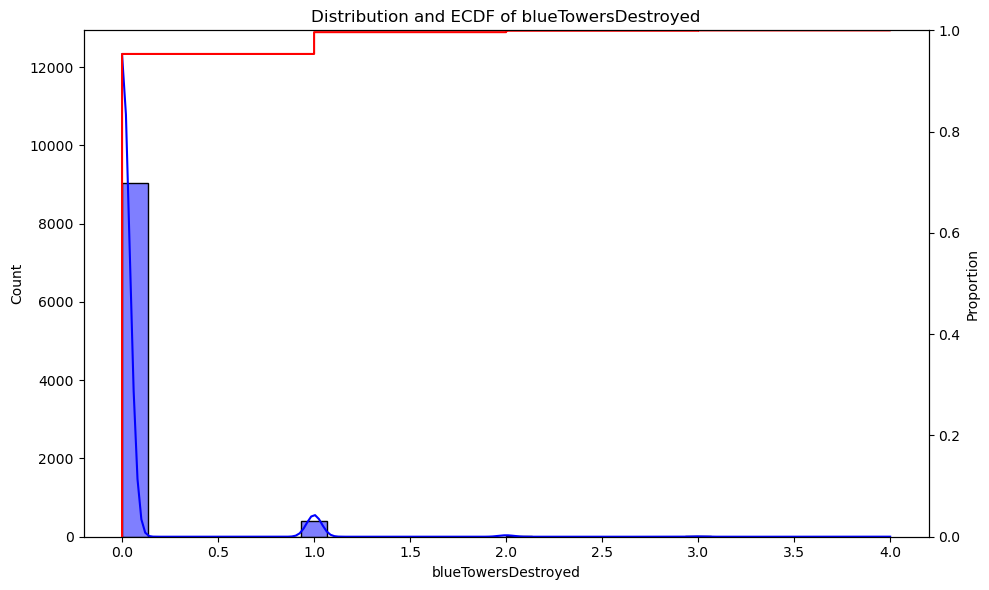

In [220]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.histplot(data=df_clean_blue_no_outliers, x="blueTowersDestroyed", kde=True, bins=30, ax=ax1, color='blue')
ax1.set_xlabel('blueTowersDestroyed')
ax1.set_ylabel('Count')
ax1.set_title('Distribution and ECDF of blueTowersDestroyed')

ax2 = ax1.twinx()
sns.ecdfplot(data=df_clean_blue_no_outliers, x="blueTowersDestroyed", ax=ax2, color='red')
ax2.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

c) KDA

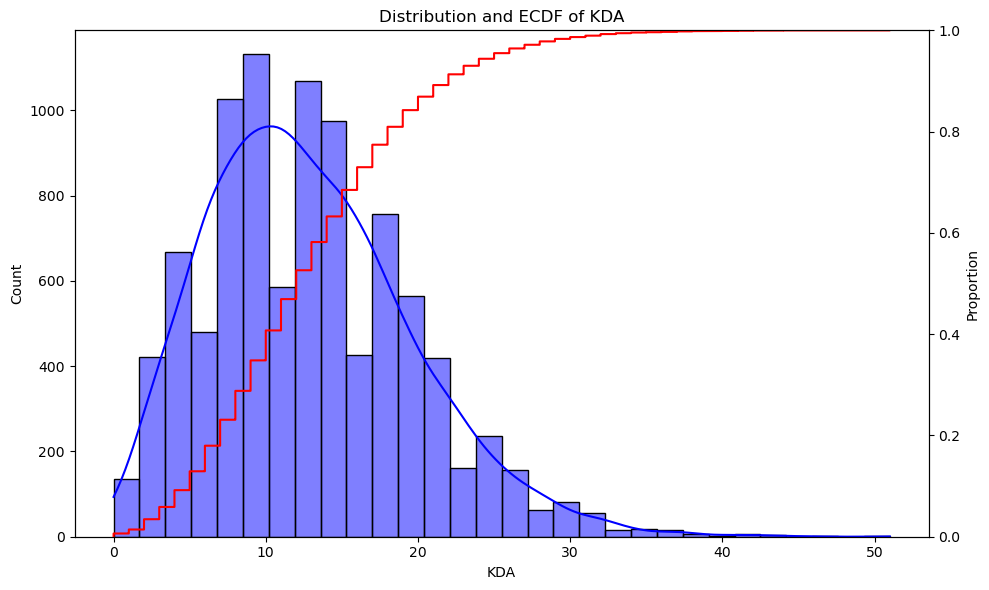

In [221]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.histplot(data=df_clean_blue_no_outliers, x="KDA", kde=True, bins=30, ax=ax1, color='blue')
ax1.set_xlabel('KDA')
ax1.set_ylabel('Count')
ax1.set_title('Distribution and ECDF of KDA')

ax2 = ax1.twinx()
sns.ecdfplot(data=df_clean_blue_no_outliers, x="KDA", ax=ax2, color='red')
ax2.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

Dựa vào biểu đồ, chúng ta có thể thấy những giá trị KDA >= 40 sẽ là ngoại lai (do những trận đấu có người troll game hoặc buff elo). DO đó sẽ loại bỏ những game đấu đó

In [222]:
df_clean_blue_no_outliers = df_clean_blue_no_outliers[df_clean_blue_no_outliers['KDA'] < 40]

In [223]:
print("Đã loại bỏ {} hàng có outliers".format(df_clean_blue2.shape[0] - df_clean_blue_no_outliers.shape[0]))

Đã loại bỏ 417 hàng có outliers


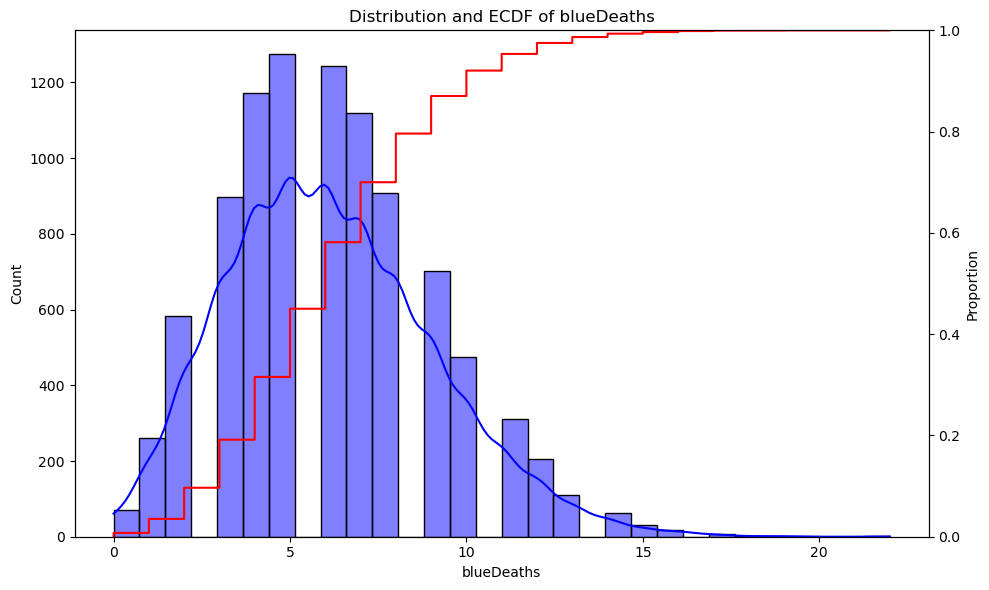

In [224]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.histplot(data=df_clean_blue_no_outliers, x="blueDeaths", kde=True, bins=30, ax=ax1, color='blue')
ax1.set_xlabel('blueDeaths')
ax1.set_ylabel('Count')
ax1.set_title('Distribution and ECDF of blueDeaths')

ax2 = ax1.twinx()
sns.ecdfplot(data=df_clean_blue_no_outliers, x="blueDeaths", ax=ax2, color='red')
ax2.set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [225]:
df_clean_blue_no_outliers = df_clean_blue_no_outliers[df_clean_blue_no_outliers['blueDeaths'] < 19]

In [226]:
print("Đã loại bỏ {} hàng có outliers".format(df_clean_blue2.shape[0] - df_clean_blue_no_outliers.shape[0]))

Đã loại bỏ 420 hàng có outliers


# 3. Xây dựng mô hình

Ở bước này, chúng ta sẽ tìm mô hình để xem khi các yếu tố thay đổi thì tỷ lệ chiến thắng của đội xanh sẽ thay đổi như thế nào?
Do đó, mô hình phù hợp nhất với tập dữ liệu Classification và có thể giải thích là mô hình Logistic_regression

In [227]:
df_model = df_clean_blue_no_outliers . copy()

In [228]:
col_to_move = 'blueWins'
columns = [col for col in df_model.columns if col != col_to_move] + [col_to_move]
df_model = df_model[columns]

In [229]:
X = df_model.iloc[:, :-1].values
y = df_model.iloc[:, -1].values

In [230]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#Trong nghiên cứu này sẽ không sử dụng do mục đích không phải là dự đoán

In [231]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [232]:
#Training the Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [233]:
classifier.score(X_train, y_train)

0.7145475049337469

In [234]:
blue_coefficient = pd.DataFrame()
blue_coefficient['Features'] = df_model.drop(['blueWins'],axis=1).columns
blue_coefficient['Coefficient'] = classifier.coef_.reshape(10,1)

In [235]:
blue_coefficient.sort_values(by='Coefficient',ascending=False)

,Features,Coefficient
9,KDA,0.798257
8,blueTotalJungleMinionsKilled,0.237817
7,blueTotalMinionsKilled,0.236597
4,blueDragons,0.200993
6,blueTowersDestroyed,0.091774
2,blueFirstBlood,0.082378
5,blueHeralds,0.056581
1,blueWardsDestroyed,0.022649
0,blueWardsPlaced,-0.033174
3,blueDeaths,-0.653836


# Phân tích
1. KDA và Deaths là 2 yếu tố ảnh hưởng mạnh nhất đến xác suất dành chiến thắng của đội xanh, khi KDA tăng thì xác suất để đội xanh dành chiến thắng sẽ tăng mạnh và ngược lại với Deaths => Cần chú trọng vào việc kiểm soát KDA và số lần nằm xuống trong 10 phút đầu vì đây có thể được coi là yếu tố chính ảnh hưởng đến thắng bại trong 1 trận đấu xếp hạng.
2. Chỉ số lính (blueTotalMinionsKilled) và chỉ số quái rừng (blueTotalJungleMinionsKilled) khi tăng thì xác suất đội dành chiến thắng cũng sẽ tăng (tuy nhiên cần đặt vào sự so sánh với chỉ số lính và chỉ số quái rừng với đội đỏ sẽ đề cập ở phần sau). => Tương tự KDA thì đây cũng là tài nguyên quan trọng dẫn đến chiến thắng.
3. Một số các chỉ số khác ảnh hưởng ít đến xác suất dành chiến thắng của đội xanh sẽ được phân tích chi tiết hơn ở phần sau.

# 4. Phân tích chi tiết 1 số yếu tố

a) Wards
Chúng ta sẽ chia thành 2 trường hợp: kiểm soát bản đồ tốt và kiểm soát bản đồ chưa tốt
Team được coi là kiểm soát bản đồ tốt khi số mắt cắm > trung vị và số mắt phá > trung vị và ngược lại

In [236]:
blue_data_wards = df_clean_blue_no_outliers.copy()

In [237]:
median_wards_placed = np.median(blue_data_wards['blueWardsPlaced'])
median_wards_destroyed = np.median(blue_data_wards['blueWardsDestroyed'])
print("Trung vị của số mắt cắm là {}".format(median_wards_placed) )
print("Trung vị của số mắt bị phá là {}".format(median_wards_destroyed))

Trung vị của số mắt cắm là 16.0
Trung vị của số mắt bị phá là 2.0


In [238]:
blue_data_wards['map_control'] = np.where(
    (blue_data_wards['blueWardsPlaced'] > median_wards_placed) & 
    (blue_data_wards['blueWardsDestroyed'] > median_wards_destroyed), 
    'Good', 
    'Bad')

In [239]:
blue_data_wards

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueDeaths,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,KDA,map_control
0,0,28,2,1,6,0,0,0,195,36,20,Bad
1,0,12,1,0,5,0,0,0,174,43,10,Bad
2,0,15,0,0,11,1,0,0,186,46,11,Bad
3,0,43,1,0,5,0,1,0,201,55,9,Bad
5,1,18,0,0,3,1,0,0,225,42,11,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,4,1,0,0,211,69,12,Bad
9875,1,54,0,0,4,1,0,0,233,48,14,Bad
9876,0,23,1,0,7,0,0,0,210,45,11,Bad
9877,0,14,4,1,3,1,0,0,224,48,5,Bad


In [240]:
total_counts = blue_data_wards.groupby("map_control")["blueWins"].count()
win_counts = blue_data_wards[blue_data_wards["blueWins"] == 1].groupby("map_control")["blueWins"].count()
win_rate_by_map_control = (win_counts / total_counts) * 100
bad_win_rate = win_rate_by_map_control.get("Bad", 0)
good_win_rate = win_rate_by_map_control.get("Good", 0)
print(f"Tỷ lệ thắng của đội khi kiểm soát bản đồ chưa tốt là {bad_win_rate:.2f}%.")
print(f"Tỷ lệ thắng của đội khi kiểm soát bản đồ tốt là {good_win_rate:.2f}%.")

Tỷ lệ thắng của đội khi kiểm soát bản đồ chưa tốt là 48.75%.
Tỷ lệ thắng của đội khi kiểm soát bản đồ tốt là 53.47%.


Chúng ta hoàn toàn có thể thấy khi 1 đội kiểm soát map tốt thì tỷ lệ thắng của họ sẽ cao hơn mặc dù cao hơn không quá nhiều. Điều này có thể giải thích rằng đây là Data của những trận đấu rank với mức rank Kim cương - là mức rank chưa quá cao nên việc kiểm soát bản đồ không được quá chú trọng, và họ cũng không biết cách để tối đa hóa công dụng của những con mắt. Hơn nữa đây cũng là Data của 10p đầu và chưa có quá nhiều mục tiêu lớn, nên việc kiểm soát tầm nhìn tốt trong 10p đầu này không ảnh hưởng quá nhiều đến tỷ lệ chiến thắng của đội đó.
=> Chúng ta có thể kết luận rằng việc kiểm soát bản đồ tốt trong 10 phút đầu sẽ không tác động quá nhiều đến kết quả của 1 trận đấu xếp hạng.

b) Dragon and Heralds

In [241]:
blue_data_monster = df_clean_blue_no_outliers.copy()

In [242]:
features_monster = ['blueWins', 'blueDragons', 'blueHeralds']

def convert(a, features_monster ):
    for feature in features_monster :
        a[feature] = a[feature].astype('int64')

convert(blue_data_monster, features_monster)

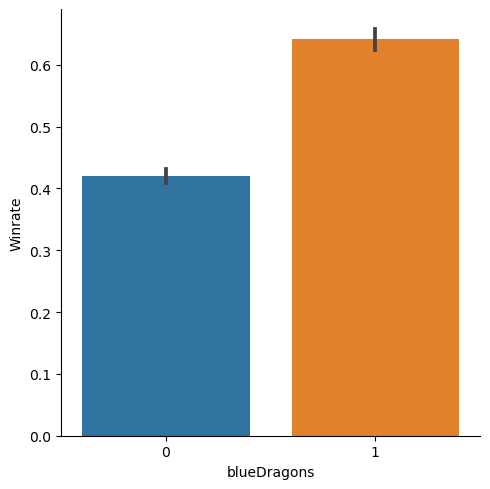

In [243]:
sns.catplot(data=blue_data_monster,kind='bar',x='blueDragons',y='blueWins')
plt.ylabel('Winrate')
plt.show()
#Do ở đây blueWins là biến nhị phân nên khi tính trung bình sẽ ra tỷ lệ thắng 

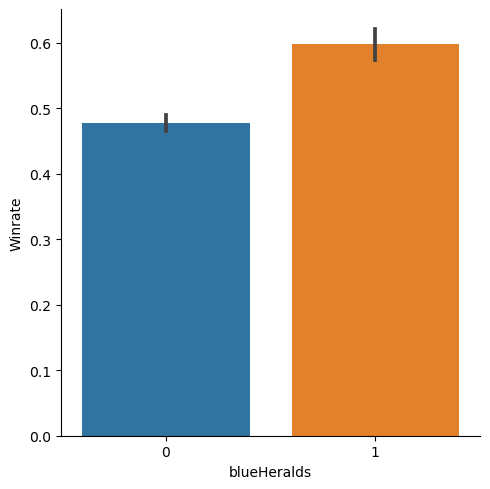

In [244]:
sns.catplot(data=blue_data_monster,kind='bar',x='blueHeralds',y='blueWins')
plt.ylabel('Winrate')
plt.show()

In [245]:
blue_data_monster['Dragons_Heralds'] = blue_data_monster['blueDragons'].astype(str) + '_' + blue_data_monster['blueHeralds'].astype(str)

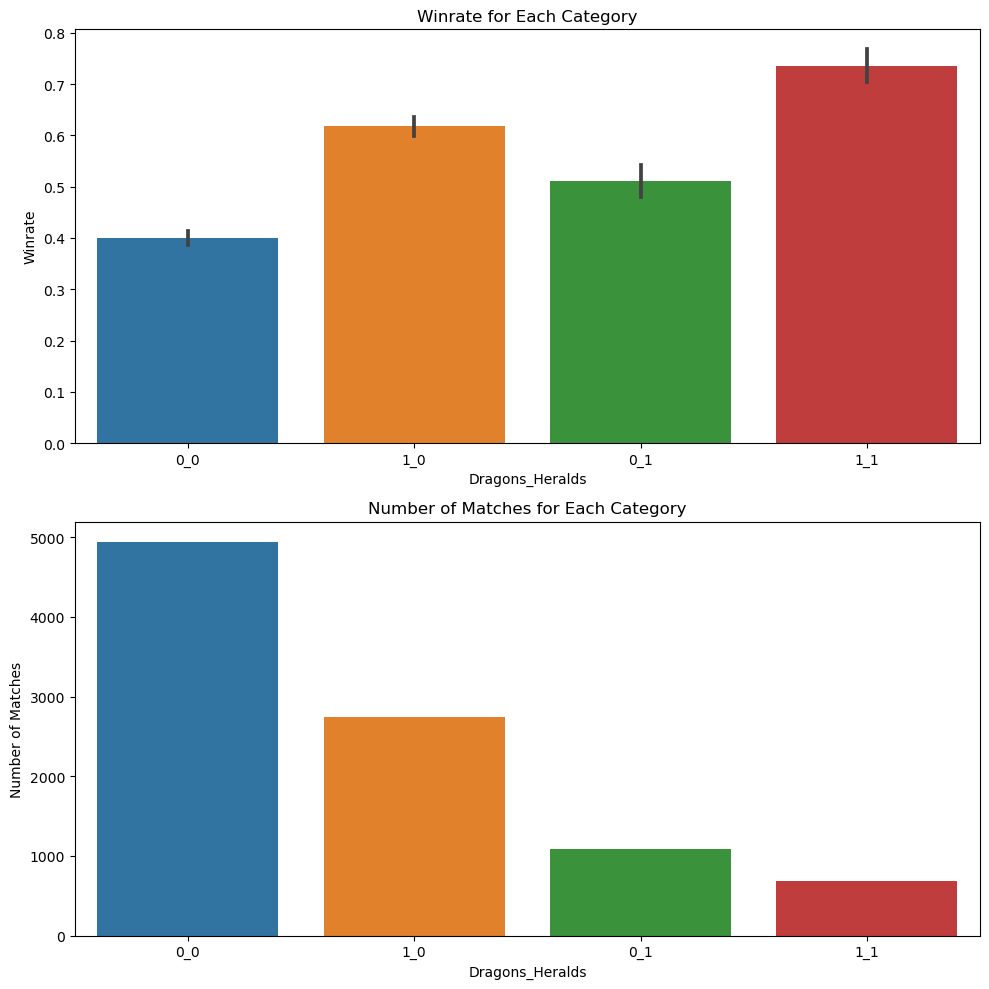

In [246]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(data=blue_data_monster, x='Dragons_Heralds', y='blueWins', ax=axes[0])
axes[0].set_ylabel('Winrate')
axes[0].set_title('Winrate for Each Category')

sns.countplot(data=blue_data_monster, x='Dragons_Heralds', ax=axes[1])
axes[1].set_ylabel('Number of Matches')
axes[1].set_xlabel('Dragons_Heralds')
axes[1].set_title('Number of Matches for Each Category')

# Hiển thị cả hai biểu đồ
plt.tight_layout()
plt.show()

Dựa vào biểu đồ, chúng ta hoàn toàn có thể nhận ra mục tiêu lớn ở đầu trận (10p đầu) ảnh hưởng khá rõ ràng đến tỷ lệ thắng
- Khi một đội kiểm soát được rồng ở đầu trận thì có tỷ lệ thắng trên 60%, chứng tỏ rồng là mục tiêu ảnh hưởng khá cao đến tỷ lệ thắng.
- Ngược lại, khi đội kiểm soát được sứ giả ở đầu trận thì tỷ lệ thắng tăng lên không đáng kể, chỉ khoảng 50%, chứng tỏ sứ giả là mục tiêu không ảnh hưởng nhiều đến tỷ lệ thắng. Điều này có thể được giải thích 1 phần là do những trận đấu rank, người chơi không biết cách lăn cầu tuyết khi có lợi thế. Nghĩa là khi họ lấy được sứ giả và điều đó giúp họ dễ lấy trụ hơn nhưng người chơi không biết cách lăn cầu tuyết dựa trên lợi thế đó.
- Cuối cùng khi người chơi kiểm soát được cả 2 mục tiêu là rồng và sứ giả thì tỷ lệ thắng sẽ rất cao, khoảng 75% mặc dù số trận xảy ra trường hợp này khá ít, nhưng nếu có thì hầu hết là sẽ dành chiến thắng.
=> Từ đó chúng ta có thể kết luận rằng thứ tự mục tiêu ưu tiên là Rồng rồi sau đó mới đến Sứ giả. Và nếu có thể kiểm soát đồng thời cả 2 mục tiêu thì gần như đã 'chạm 1 tay đến chiến thắng'.

c) Towers Destroyed

In [247]:
blue_data_tower = df_clean_blue_no_outliers.copy()

In [248]:
blue_data_tower['blueTowersDestroyed'].value_counts()

0    9021
1     405
2      26
3       6
4       1
Name: blueTowersDestroyed, dtype: int64

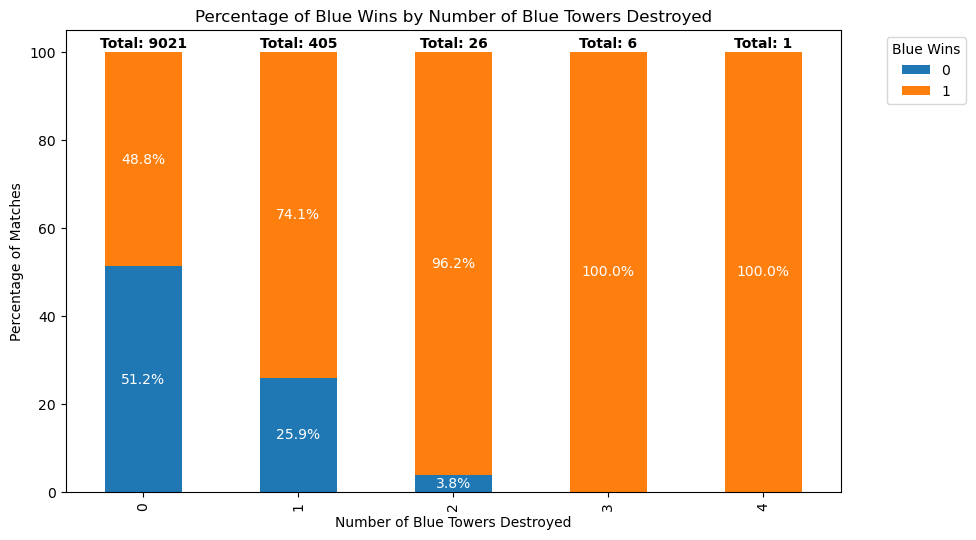

In [249]:
# Tính số lượng mỗi trận thắng và thua theo từng blueTowersDestroyed
tower_win_counts = blue_data_tower.groupby(['blueTowersDestroyed', 'blueWins']).size().unstack(fill_value=0)

# Tính %
tower_win_percentages = tower_win_counts.div(tower_win_counts.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

tower_win_percentages.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Number of Blue Towers Destroyed')
ax.set_ylabel('Percentage of Matches')
ax.set_title('Percentage of Blue Wins by Number of Blue Towers Destroyed')
ax.legend(title='Blue Wins', labels=['0', '1'], bbox_to_anchor=(1.05, 1), loc='upper left')

#Tạo Label
for i, row in enumerate(tower_win_percentages.values):
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, row[:j].sum() + val / 2, f"{val:.1f}%", ha="center", va="center", color="white", fontsize=10)
#Tạo cột tổng
total_counts = tower_win_counts.sum(axis=1)
for i, total in enumerate(total_counts):
    ax.text(i, 102, f"Total: {total}", ha="center", va="center", fontsize=10, fontweight="bold")

plt.show()



Dựa vào biểu đồ, chúng ta hoàn toàn có thể nhận ra được, hầu hết các trận đấu xếp hạng sẽ không có trụ đầu trong 10p đầu tiên của trận đấu. Tuy nhiên, nếu đội có được trụ đầu thì tỷ lệ chiến thắng của đội sẽ tăng lên khá cao. Hơn nữa, nếu đội có được 2 trụ trở lên thì gần như chắc chắn đội sẽ dành được chiến thắng (mặc dù số lượng các trận đấu xảy ra TH này khá hiếm - chỉ khoảng 30 trận trên tổng số hơn 9500 trận). Điều này cho thấy tầm quan trọng của việc kiểm soát công trình trong 1 trận đấu, vì trụ là nguồn cung cấp tiền cũng như kiểm soát bản đồ rất quan trọng

d) First Blood

In [250]:
blue_data_first_blood = df_clean_blue_no_outliers.copy()

In [251]:
features_first_blood = ['blueWins','blueFirstBlood' ]

convert(blue_data_first_blood, features_first_blood)

In [252]:
blue_data_first_blood['blueFirstBlood'].value_counts()

1    4773
0    4686
Name: blueFirstBlood, dtype: int64

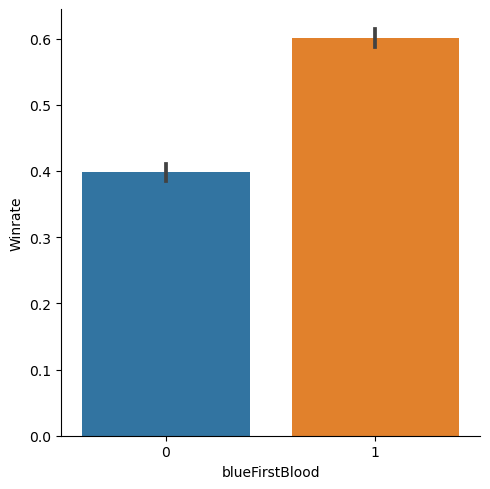

In [253]:
sns.catplot(data=blue_data_first_blood,kind='bar',x='blueFirstBlood',y='blueWins')
plt.ylabel('Winrate')
plt.show()

Dựa vào biểu đồ chúng ta có thể nhận thấy có được chiến công đầu sẽ giúp làm tăng tỷ lệ chiến thắng lên. Tuy nhiên tỷ lệ này tăng không quá cao (khoảng 60%). Một lần nữa chúng ta nhìn nhận về mức rank và tính chuyên môn của các trận đấu xếp hạng tại mức rank kim cương. Khi 1 người chơi có được chiến công đầu, nhưng không phải ai cũng biết cách tạo ra thêm lợi thế từ mạng chiến công đầu đó, vì vậy tỷ lệ thắng khi có chiến công đầu không phải là quá cao do phụ thuộc vào cả trình độ "snow ball" của người cầm mạng chiến công đầu đó nữa.
=> Chúng ta có thể kết luận rằng việc có chiến công đầu có ảnh hưởng đến tỷ lệ thắng của đội khi mang lại sự chênh lệch về vàng và kinh nghiệm so với đối thủ cùng đường. Tuy nhiên để chuyển hóa mạng chiến công đầu đó thành chiến thắng còn bị phụ thuộc khá nhiều vào trình độ của người chơi cầm mạng chiến công đầu đó nữa

# 5. So sánh với red side

CHúng tôi sẽ so sánh những yếu tố có thể so sánh giữa 2 đội và xem những chỉ số nào gap so với đối thủ xem có thể mang lại tỷ lệ thắng cao. Hai chỉ số có ý nghĩa mà chúng tôi sẽ dùng để so sánh ở đây bao gồm: số mắt cắm + số mắt phá (điểm tầm nhìn) và chỉ số lính

In [254]:
df_compare = df_clean.copy()

In [255]:
df_compare = df_compare[df_compare['blueWardsPlaced'] < 70]
df_compare = df_compare[df_compare['redWardsPlaced'] < 70]
df_compare = df_compare[df_compare['blueWardsDestroyed'] < 12]
df_compare = df_compare[df_compare['redWardsDestroyed'] < 12]

In [256]:
print("Đã loại bỏ {} hàng có outliers".format(df_clean.shape[0] - df_compare.shape[0]))

Đã loại bỏ 770 hàng có outliers


a) Số mắt cắm và số mắt phá

In [257]:
data_wards = df_compare.copy()

In [258]:
data_wards['WardsPlacedbluegap'] = data_wards['blueWardsPlaced'] - data_wards['redWardsPlaced']

In [259]:
features_wards = ['blueWins']

convert(data_wards, features_wards)

In [260]:
win_rate_by_gap = data_wards.groupby('WardsPlacedbluegap')['blueWins'].mean()

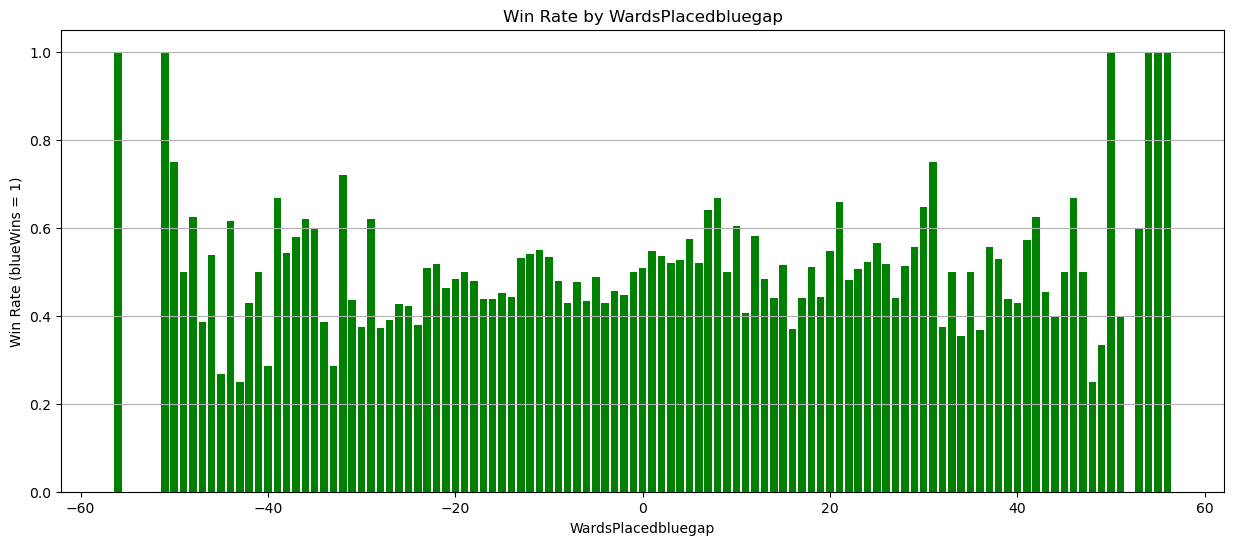

In [261]:
# Using a bar chart for visualization
plt.figure(figsize=(15, 6))
plt.bar(win_rate_by_gap.index, win_rate_by_gap.values, color='green')
plt.title('Win Rate by WardsPlacedbluegap')
plt.xlabel('WardsPlacedbluegap')
plt.ylabel('Win Rate (blueWins = 1)')
plt.grid(axis='y')
plt.show()


Dựa vào đây chúng ta có thể nhận ra:
- Khi số mắt giữa 2 đội không chệnh lệch quá nhiều (từ 0 - 20 mắt) thì tỷ lệ thắng của đội xanh khá khó đoán do dao động ở mức 50% => Khi không có đội nào chiếm ưu thế về tầm nhìn thì kết quả trận đấu sẽ khá khó đoán và phụ thuộc nhiều vào các yếu tố khác
- Khi số chênh lệch số mắt của 2 đội lớn thì tỷ lệ thắng cao hơn sẽ nghiêng về số đội kiểm soát tầm nhìn tốt hơn, tuy nhiên tỷ lệ này không nhất quán. Nghĩa là đội xanh có thể thua khi mất lợi thế tầm nhìn (có số mắt cắm ít hơn nhiều so với đội đỏ), nhưng vẫn có những trường hợp thắng khi thực hiện các chiến thuật khác bù lại việc thiếu tầm nhìn hoặc cắm ít mắt nhưng hiệu quả và ngược lại.
=> Chúng ta có thể kết luận rằng việc chênh lệch số lượng mắt cắm giữa 2 team trong 10 phút đầu không ảnh hưởng quá nhiều đến tỷ lệ thắng của 2 độ. Lý do đã giải thích ở phần phân tích chi tiết về wards của đội xanh.

In [262]:
data_wards['WardsDestroyedbluegap'] = data_wards['blueWardsDestroyed'] - data_wards['redWardsDestroyed']

In [263]:
win_rate_by_wardsDestroyed_gap = data_wards.groupby('WardsDestroyedbluegap')['blueWins'].mean()

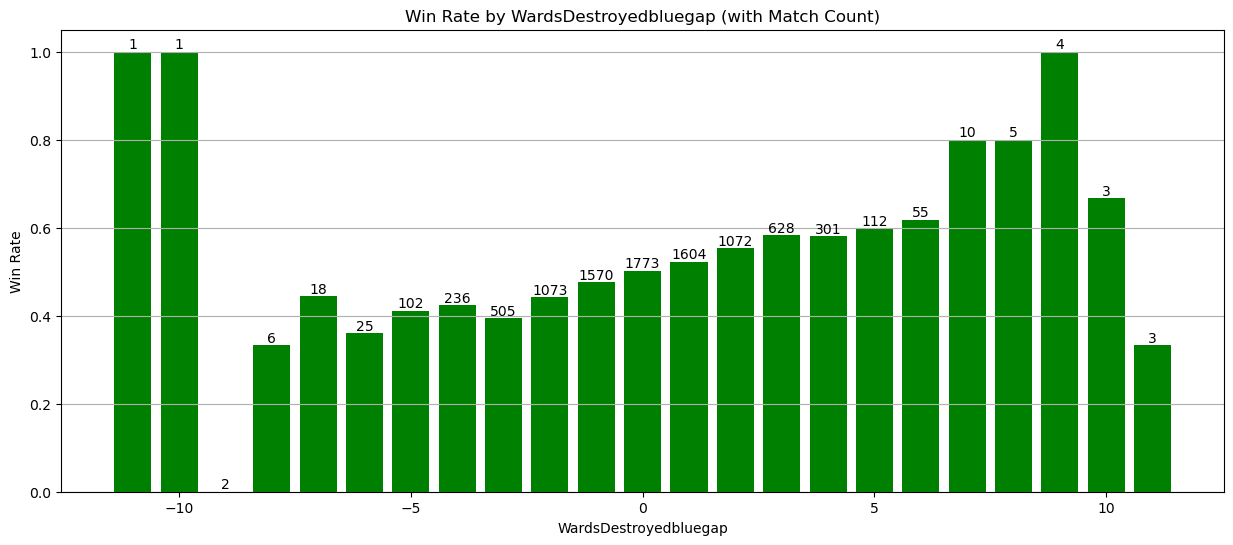

In [264]:
match_count_by_wardsDestroyed_gap = data_wards['WardsDestroyedbluegap'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
bars = plt.bar(win_rate_by_wardsDestroyed_gap.index, win_rate_by_wardsDestroyed_gap.values, color='green')

for bar, count in zip(bars, match_count_by_wardsDestroyed_gap):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{count}', va='bottom', ha='center', fontsize=10)

plt.title('Win Rate by WardsDestroyedbluegap (with Match Count)')
plt.xlabel('WardsDestroyedbluegap')
plt.ylabel('Win Rate')
plt.grid(axis='y')
plt.show()

Tương tự với số mắt cắm, tuy nhiên số mắt phá có xu hướng rõ ràng hơn bởi vì mắt chúng ta có thể cắm bừa và không hiệu quả nhưng mắt phá thì chắc chắn sẽ hiệu quả. Dựa vào biểu đồ, ta có thể nhận thấy hầu hết các trận đấu trong 10p đầu chỉ có số mắt phá chênh lệch từ 0 - 5 mắt, và tỷ lệ thắng cũng sẽ tăng khi chênh lệch số mắt phá giữa 2 đội tăng. Mặc dù tỷ lệ này không quá cao (khoảng 60%) nhưng phần nào cũng khẳng định được tầm quan trọng của việc kiểm soát tầm nhìn "HIỆU QUẢ" đến chiến thắng của 1 đội.

b) Chỉ số lính và quái rừng

In [265]:
data_monster = df_compare.copy()

In [266]:
features_monster = ['blueWins']

convert(data_monster, features_monster)

In [267]:
data_monster['totalblueMinions'] = data_monster['blueTotalMinionsKilled'] + data_monster['blueTotalJungleMinionsKilled']
data_monster['totalredMinions'] = data_monster['redTotalMinionsKilled'] + data_monster['redTotalJungleMinionsKilled']

In [268]:
data_monster['blueMinionsgap'] = data_monster['totalblueMinions'] - data_monster['totalredMinions']

In [269]:
data_monster = data_monster[(data_monster['blueMinionsgap'] < 100)]
data_monster = data_monster[(data_monster['blueMinionsgap'] > - 100)]

In [270]:
win_rate_by_minions_gap = data_monster.groupby('blueMinionsgap')['blueWins'].mean()

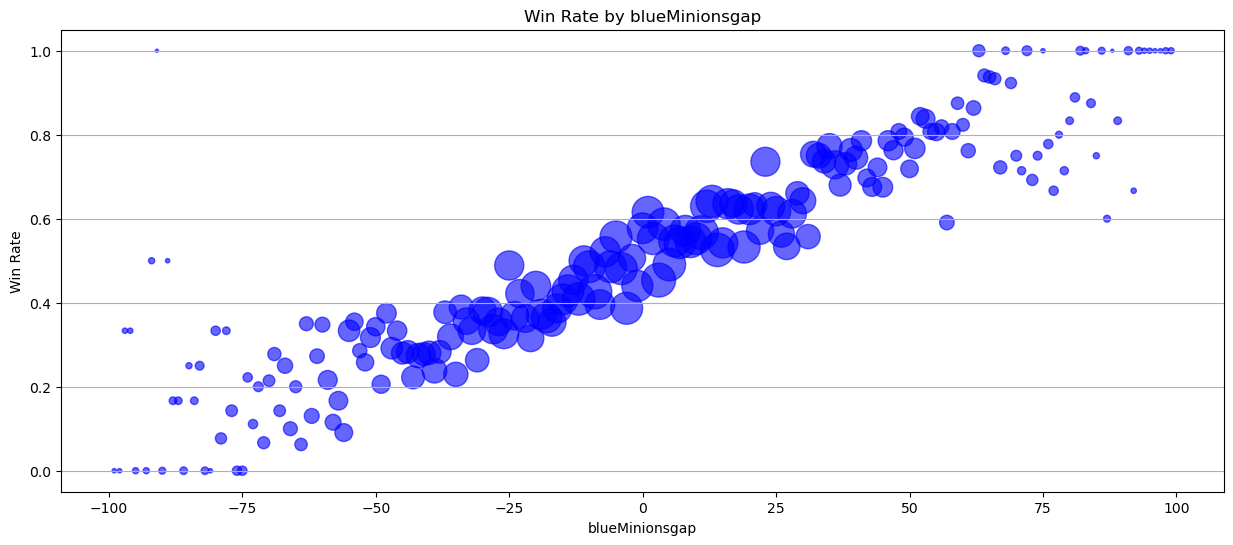

In [271]:
match_count_by_minions_gap = data_monster['blueMinionsgap'].value_counts().sort_index()

aligned_match_count = match_count_by_minions_gap.reindex(win_rate_by_minions_gap.index).fillna(0)

plt.figure(figsize=(15, 6))
plt.scatter(win_rate_by_minions_gap.index, win_rate_by_minions_gap.values,color='blue', s=aligned_match_count.values*5, alpha=0.6)
plt.title('Win Rate by blueMinionsgap')
plt.xlabel('blueMinionsgap')
plt.ylabel('Win Rate')
plt.grid(axis='y')
plt.show()

Chúng ta có thể nhận thấy rằng chỉ số lính chênh lệch giữa 2 đội trong 10p đầu ảnh hưởng khá đáng kể đến tỷ lệ thắng của đội trong 1 trận đấu xếp hạng. Khi chỉ số lính chênh lệch càng nhiều thì tỷ lệ thắng càng tăng (ngoại trừ 1 số trường hợp ngoại lệ), và tỷ lệ thắng này khá cao (từ 60% - 80% khi chỉ số lính gap từ 25 - 50)
=> Chúng ta có thể kết luận rằng việc kiểm soát lane và việc thắng đường đầu trận ảnh hưởng rất đáng kể đến tỷ lệ thắng. Nếu các lane có 1 giai đoạn đi đường tốt và hơn được đối thủ cùng đường chỉ số lính thì tỷ lệ thắng của toàn đội sẽ tăng lên khá cao.